Enter the stock ticker (e.g., AAPL):  META
Enter the year (e.g., 2023):  2024
Enter the quarter (1, 2, 3, or 4):  1



Fetching earnings call date for META in Q1 2024...

Earnings Call Date: 2024-04-30
Reported EPS: 4.71
Estimated EPS: 4.32

Fetching transcript for META in Q1 2024...
Transcript fetched successfully!

Analyzing sentiment of the transcript...

Sentiment Analysis Result:
Sentiment: Positive
Details: The sentiment of the text is generally positive. The language used by the speakers, such as "good start to the year," "healthy growth," "good progress," and "feedback is very positive," conveys a positive tone. Mark Zuckerberg specifically mentions the positive feedback received about Meta AI and the successful rollout of the new version. The overall atmosphere of the conference call seems optimistic and focused on the achievements and advancements made by Meta. Therefore, the sentiment can be classified as Positive.

Fetching stock prices for META...


[*********************100%***********************]  1 of 1 completed


Stock Prices for the Following Week:
Ticker            META
Date                  
2024-05-01  439.190002
2024-05-02  441.679993
2024-05-03  451.959991
2024-05-06  465.679993


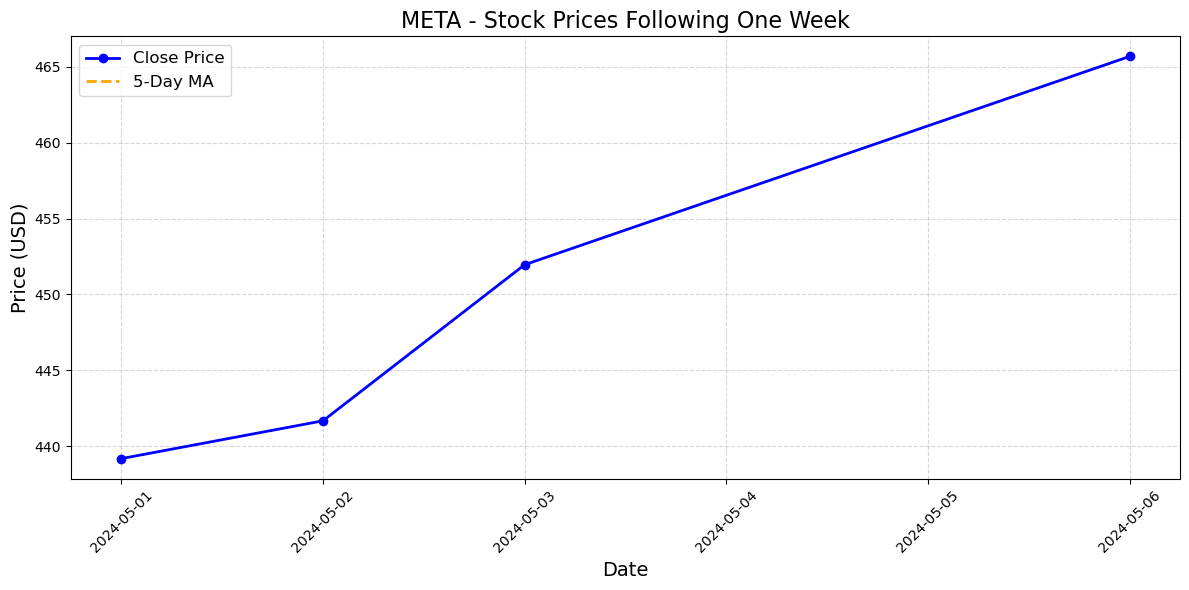

[*********************100%***********************]  1 of 1 completed


Stock Prices for the Following Three Months:
Ticker            META
Date                  
2024-05-01  439.190002
2024-05-02  441.679993
2024-05-03  451.959991
2024-05-06  465.679993
2024-05-07  468.239990
2024-05-08  472.600006
2024-05-09  475.420013
2024-05-10  476.200012
2024-05-13  468.010010
2024-05-14  471.850006
2024-05-15  481.540009
2024-05-16  473.230011
2024-05-17  471.910004
2024-05-20  468.839996
2024-05-21  464.630005
2024-05-22  467.779999
2024-05-23  465.779999
2024-05-24  478.220001
2024-05-28  479.920013
2024-05-29  474.359985
2024-05-30  467.049988
2024-05-31  466.829987
2024-06-03  477.489990
2024-06-04  476.989990
2024-06-05  495.059998
2024-06-06  493.760010
2024-06-07  492.959991
2024-06-10  502.600006
2024-06-11  507.470001
2024-06-12  508.839996
2024-06-13  504.100006
2024-06-14  504.160004
2024-06-17  506.630005
2024-06-18  499.489990
2024-06-20  501.700012
2024-06-21  494.779999
2024-06-24  498.910004
2024-06-25  510.600006
2024-06-26  513.119995
2024-06-27 

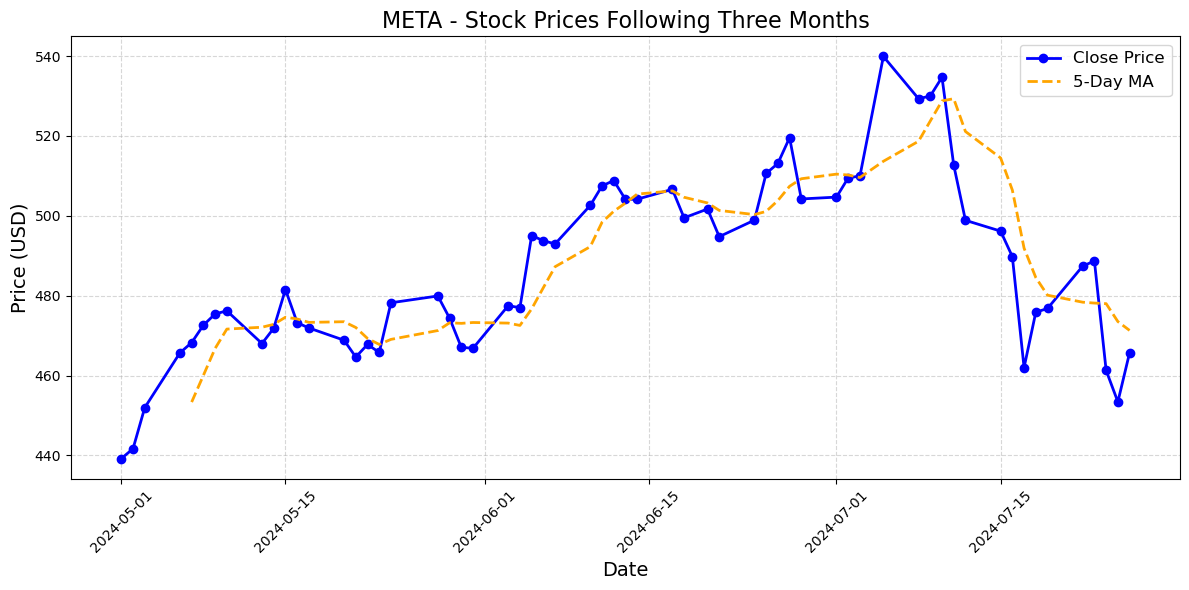

In [1]:
# Import necessary libraries
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import linregress

# API Keys
NINJA_API_KEY = "yf7Ej6PEjxU265YzTJghq8A==7tzXLKJCx7mfff6V"

OPENAI_API_KEY = "
ALPHA_VANTAGE_API_KEY = "DFLCYFH81EQYR0CB"  # Replace with your Alpha Vantage API key


# API URLs
NINJA_API_URL = "https://api.api-ninjas.com/v1/earningstranscript"
ALPHA_VANTAGE_API_URL = "https://www.alphavantage.co/query"
OPENAI_API_URL = "https://api.openai.com/v1/chat/completions"

# Function to fetch earnings data from Alpha Vantage
def fetch_earnings_data(ticker):
    params = {
        "function": "EARNINGS",
        "symbol": ticker,
        "apikey": ALPHA_VANTAGE_API_KEY
    }
    try:
        response = requests.get(ALPHA_VANTAGE_API_URL, params=params)
        response.raise_for_status()
        data = response.json()
        if "quarterlyEarnings" in data:
            return data["quarterlyEarnings"]
        else:
            print(f"No quarterly earnings data found for {ticker}.")
            return None
    except Exception as e:
        print(f"An error occurred while fetching earnings data: {e}")
        return None

# Function to extract earnings for the specified period
def extract_earnings_for_period(data, year, quarter):
    for record in data:
        fiscal_date = datetime.strptime(record["fiscalDateEnding"], '%Y-%m-%d')
        fiscal_year = fiscal_date.year
        fiscal_quarter = (fiscal_date.month - 1) // 3 + 1
        if fiscal_year == int(year) and fiscal_quarter == int(quarter):
            earnings_call_date = fiscal_date + timedelta(days=30)
            return {
                'earningsCallDate': earnings_call_date.strftime('%Y-%m-%d'),
                'reportedEPS': record.get("reportedEPS"),
                'estimatedEPS': record.get("estimatedEPS")
            }
    return None

# Function to fetch board meeting transcript from API Ninjas
def fetch_transcript(ticker, year, quarter):
    headers = {"X-Api-Key": NINJA_API_KEY}
    params = {"ticker": ticker, "year": year, "quarter": quarter}
    try:
        response = requests.get(NINJA_API_URL, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()
        if 'transcript' in data:
            return data['transcript']
        else:
            print(f"No transcript found for {ticker} in Q{quarter} {year}.")
            return None
    except Exception as e:
        print(f"An error occurred while fetching the transcript: {e}")
        return None

# Function to analyze sentiment using OpenAI GPT API via requests
def analyze_sentiment_with_openai(text):
    headers = {
        "Authorization": f"Bearer {OPENAI_API_KEY}",
        "Content-Type": "application/json"
    }
    try:
        max_chars = 4000  # Adjust to OpenAI limit
        if len(text) > max_chars:
            text = text[:max_chars]

        payload = {
            "model": "gpt-3.5-turbo",
            "messages": [
                {
                    "role": "system",
                    "content": "You are a helpful assistant specializing in sentiment analysis."
                },
                {
                    "role": "user",
                    "content": f"Analyze the following text for sentiment and classify it as Positive, Neutral, or Negative. Provide reasoning:\n\n{text}"
                }
            ],
            "max_tokens": 300,
            "temperature": 0.5,
        }

        response = requests.post(OPENAI_API_URL, headers=headers, json=payload)
        response.raise_for_status()
        result = response.json()
        sentiment_text = result['choices'][0]['message']['content'].strip()

        # Extract sentiment
        if "Positive" in sentiment_text:
            sentiment = "Positive"
        elif "Negative" in sentiment_text:
            sentiment = "Negative"
        elif "Neutral" in sentiment_text:
            sentiment = "Neutral"
        else:
            sentiment = "Unknown"

        return {"sentiment": sentiment, "details": sentiment_text}

    except Exception as e:
        print(f"An error occurred during sentiment analysis: {e}")
        return {"sentiment": "Error", "details": str(e)}

# Function to fetch stock prices using yfinance
def fetch_stock_prices(ticker, start_date, end_date):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        if stock_data.empty:
            print(f"No stock data found for {ticker} between {start_date} and {end_date}.")
            return None
        return stock_data
    except Exception as e:
        print(f"An error occurred while fetching stock data: {e}")
        return None

# Function to plot stock prices
def plot_stock_prices(stock_data, title):
    if stock_data is None or stock_data.empty:
        print("No data available to plot.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', marker='o', color='blue', linestyle='-', linewidth=2)

    # Add moving average (e.g., 5-day)
    ma_series = stock_data['Close'].rolling(window=5).mean()
    plt.plot(stock_data.index, ma_series, label='5-Day MA', color='orange', linestyle='--', linewidth=2)

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    ticker = input("Enter the stock ticker (e.g., AAPL): ").strip().upper()
    year = input("Enter the year (e.g., 2023): ").strip()
    quarter = input("Enter the quarter (1, 2, 3, or 4): ").strip()

    # Fetch earnings call date
    print(f"\nFetching earnings call date for {ticker} in Q{quarter} {year}...")
    earnings_data = fetch_earnings_data(ticker)
    if earnings_data:
        earnings_for_period = extract_earnings_for_period(earnings_data, year, quarter)
        if earnings_for_period:
            earnings_call_date = earnings_for_period['earningsCallDate']
            print(f"\nEarnings Call Date: {earnings_call_date}")
            print(f"Reported EPS: {earnings_for_period['reportedEPS']}")
            print(f"Estimated EPS: {earnings_for_period['estimatedEPS']}")
        else:
            print(f"No earnings call data found for {ticker} in Q{quarter} {year}.")
            return
    else:
        print(f"Failed to fetch earnings data for {ticker}.")
        return

    # Fetch transcript
    print(f"\nFetching transcript for {ticker} in Q{quarter} {year}...")
    transcript = fetch_transcript(ticker, year, quarter)
    if transcript:
        print("Transcript fetched successfully!")
        print("\nAnalyzing sentiment of the transcript...")
        sentiment_result = analyze_sentiment_with_openai(transcript)
        if sentiment_result['sentiment'] != "Error":
            print("\nSentiment Analysis Result:")
            print(f"Sentiment: {sentiment_result['sentiment']}")
            print(f"Details: {sentiment_result['details']}")
        else:
            print("Failed to analyze sentiment.")
    else:
        print("Failed to fetch transcript.")

    # Fetch and plot stock prices
    print(f"\nFetching stock prices for {ticker}...")
    earnings_date = datetime.strptime(earnings_call_date, '%Y-%m-%d')
    next_day = earnings_date + timedelta(days=1)
    one_week = earnings_date + timedelta(days=7)
    three_months = earnings_date + timedelta(days=90)

    one_week_data = fetch_stock_prices(ticker, next_day.strftime('%Y-%m-%d'), one_week.strftime('%Y-%m-%d'))
    if one_week_data is not None:
        print("\nStock Prices for the Following Week:")
        print(one_week_data['Close'])
        plot_stock_prices(one_week_data, f"{ticker} - Stock Prices Following One Week")

    three_months_data = fetch_stock_prices(ticker, next_day.strftime('%Y-%m-%d'), three_months.strftime('%Y-%m-%d'))
    if three_months_data is not None:
        print("\nStock Prices for the Following Three Months:")
        print(three_months_data['Close'])
        plot_stock_prices(three_months_data, f"{ticker} - Stock Prices Following Three Months")

if __name__ == "__main__":
    main()